In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

In [2]:
stock_data = pd.read_csv('merged_data.csv')
stock_data

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\1059191776.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  stock_data = pd.read_csv('merged_data.csv')


,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low,Date,LTP,Close - LTP,Close - LTP %
0,ACLBSL,50.94,"1,205.00","1,227.00","1,205.00","1,227.00","1,210.63",696,"1,227.00","842,596.00",...,1.83,1.33,"1,482.09","1,525.55","1,938.00",752,1/1/2022,NaN,NaN,NaN
1,ADBL,43.47,499,499,488,492,491.32,"200,533.00",494,"98,526,860.80",...,2.25,0.14,516.99,492.36,620,398,1/1/2022,NaN,NaN,NaN
2,AHPC,38,430,435,423,429.8,428.42,"74,145.00",427,"31,765,538.40",...,2.84,0.32,513.87,464.58,785,203,1/1/2022,NaN,NaN,NaN
3,AIL,53.35,661,705,661,678,681.12,"4,726.00",674,"3,218,967.00",...,6.66,-0.46,759.84,798.52,"1,125.00",588.8,1/1/2022,NaN,NaN,NaN
4,AKJCL,39.6,270,280,270,273,273.84,"44,404.00",274.9,"12,159,732.60",...,3.70,-0.31,334.76,293.73,502,116,1/1/2022,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361712,USHL,-,770,830,756,756,790.9,"47,253.00",785,"37,372,413.70",...,9.79,-4.62,714.35,639.11,961,355,12/31/2024,NaN,NaN,NaN
361713,USLB,-,"1,619.00","1,619.00","1,500.00","1,560.00","1,541.83","6,283.00","1,589.00","9,687,320.80",...,7.93,1.16,"1,611.85","1,711.92","2,363.30",726.2,12/31/2024,NaN,NaN,NaN
361714,VLBS,-,845.1,877,840,850,852.92,"1,375.00",858,"1,172,770.90",...,4.40,-0.34,945.43,910.5,"1,174.00",564.9,12/31/2024,NaN,NaN,NaN
361715,VLUCL,-,655,656.1,630.1,632.3,639.2,"41,888.00",657,"26,774,731.30",...,4.13,-1.09,626.99,582.49,816,445.1,12/31/2024,NaN,NaN,NaN


In [3]:
# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%m/%d/%Y')

# Sort the data by date
stock_data = stock_data.sort_values('Date')
stock_data['Date']

246665   2021-09-01
246632   2021-09-01
246631   2021-09-01
246630   2021-09-01
246629   2021-09-01
            ...    
197433   2025-07-01
197432   2025-07-01
197431   2025-07-01
197438   2025-07-01
197333   2025-07-01
Name: Date, Length: 361717, dtype: datetime64[ns]

In [4]:
stock_data

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low,Date,LTP,Close - LTP,Close - LTP %
246665,NEF,47.38,16,16.2,15.51,15.61,15.79,"243,785.00",15.7,"3,850,509.21",...,4.45,-1.18,13.86,12.85,17.49,8.4,2021-09-01,NaN,NaN,NaN
246632,KSBBL,49.88,725,740,710.2,718,723.28,"190,853.00",718,"138,040,750.90",...,4.20,-0.74,478.46,408.19,866.9,140,2021-09-01,NaN,NaN,NaN
246631,KRBL,58.19,570,607,555,569,580.38,"115,656.00",568,"67,124,297.40",...,9.37,-2.00,304.2,254.6,607,100,2021-09-01,NaN,NaN,NaN
246630,KPCL,48.69,716,739,685,730,720.2,"31,013.00",702,"22,335,512.70",...,7.88,1.34,446.17,371.56,878.9,113,2021-09-01,NaN,NaN,NaN
246629,KMCDB,51.88,"1,360.00","1,370.00","1,315.00","1,320.50","1,325.75","11,287.00","1,338.00","14,963,792.30",...,4.18,-0.40,"1,395.47","1,287.15","1,715.00",710,2021-09-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197433,KBL,-,209,211,206,209.88,208.49,"181,826.00",208.29,"37,908,902.10",...,2.43,0.66,206.33,211.99,272.9,133.2,2025-07-01,210,-0.12,0.0
197432,JSLBB,-,"1,270.00","1,345.00","1,270.00","1,332.30","1,312.50","2,241.00","1,271.00","2,941,316.00",...,5.91,1.49,"1,495.43","1,525.23","1,860.40","1,216.20",2025-07-01,"1,337.00",-4.70,0.0
197431,JOSHI,-,332,348,322.1,342,337.68,"80,295.00",326.78,"27,113,989.10",...,8.04,1.26,399.66,383.41,521.6,265,2025-07-01,342,0.00,0.0
197438,KKHC,-,382.7,399.6,382.7,393.4,393.7,"48,352.00",390.46,"19,036,266.30",...,4.42,-0.08,364.19,345.68,475,218,2025-07-01,392.8,0.60,0.0


In [5]:
# Remove commas from numeric columns and convert to float
numeric_columns = ['Close', 'High', 'Low']
stock_data[numeric_columns] = stock_data[numeric_columns].replace(',', '', regex=True).astype(float)

In [6]:
# Calculate Simple Moving Average (SMA)
stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=14)

In [7]:
# Calculate Weighted Moving Average (WMA)
stock_data['WMA'] = talib.WMA(stock_data['Close'], timeperiod=14)

In [8]:
# Calculate Momentum
stock_data['Momentum'] = talib.MOM(stock_data['Close'], timeperiod=14)

In [9]:
# Calculate Stochastic %K and %D
slowk, slowd = talib.STOCH(stock_data['High'], stock_data['Low'], stock_data['Close'])
stock_data['Stochastic_%K'] = slowk
stock_data['Stochastic_%D'] = slowd

In [10]:
# Calculate Relative Strength Index (RSI)
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

In [11]:
# Calculate Moving Average Convergence Divergence (MACD)
macd, signal, _ = talib.MACD(stock_data['Close'])
stock_data['MACD'] = macd
stock_data['MACD_Signal'] = signal

In [12]:
# Calculate Larry Williams R%
stock_data['Larry_Williams_R%'] = talib.WILLR(stock_data['High'], stock_data['Low'], stock_data['Close'])

In [14]:
# Calculate Accumulation/Distribution Oscillator (A/D Oscillator)
#stock_data['A/D_Oscillator'] = talib.ADOSC(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'].str.replace(',', '').astype(float))

In [15]:
# Calculate Commodity Channel Index (CCI)
stock_data['CCI'] = talib.CCI(stock_data['High'], stock_data['Low'], stock_data['Close'])

In [16]:
stock_data.columns

Index(['Symbol', 'Conf.', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Vol',
       'Prev. Close', 'Turnover', 'Trans.', 'Diff', 'Range', 'Diff %',
       'Range %', 'VWAP %', '120 Days', '180 Days', '52 Weeks High',
       '52 Weeks Low', 'Date', 'LTP', 'Close - LTP', 'Close - LTP %', 'SMA',
       'WMA', 'Momentum', 'Stochastic_%K', 'Stochastic_%D', 'RSI', 'MACD',
       'MACD_Signal', 'Larry_Williams_R%', 'CCI'],
      dtype='object')

In [17]:
new_data = stock_data[['Close','Date','Open', 'High', 'Low','SMA','WMA', 'Momentum', 'Stochastic_%K', 'Stochastic_%D',
       'RSI', 'MACD', 'MACD_Signal', 'Larry_Williams_R%',
       'CCI']]
new_data

,Close,Date,Open,High,Low,SMA,WMA,Momentum,Stochastic_%K,Stochastic_%D,RSI,MACD,MACD_Signal,Larry_Williams_R%,CCI
246665,15.61,2021-09-01,16,16.2,15.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246632,718.00,2021-09-01,725,740.0,710.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246631,569.00,2021-09-01,570,607.0,555.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246630,730.00,2021-09-01,716,739.0,685.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246629,1320.50,2021-09-01,"1,360.00",1370.0,1315.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197433,209.88,2025-07-01,209,211.0,206.00,565.453571,582.960856,-250.00,36.470735,45.248191,48.177929,25.877700,-14.392615,-89.421801,-52.264743
197432,1332.30,2025-07-01,"1,270.00",1345.0,1270.00,582.820714,685.207047,243.14,59.666585,54.076707,53.377802,82.269887,4.939885,-30.315956,103.795444
197431,342.00,2025-07-01,332,348.0,322.10,544.528571,653.097618,-536.09,32.589164,42.908828,48.731731,46.515960,13.255100,-82.464455,-29.953982
197438,393.40,2025-07-01,382.7,399.6,382.70,557.290714,632.947142,178.67,32.733289,41.663013,48.979957,22.073812,15.018843,-79.757767,-24.248544


In [18]:
new_data.isna().sum()

Close                 0
Date                  0
Open                  0
High                  0
Low                   0
SMA                  13
WMA                  13
Momentum             14
Stochastic_%K         8
Stochastic_%D         8
RSI                  14
MACD                 33
MACD_Signal          33
Larry_Williams_R%    13
CCI                  13
dtype: int64

In [19]:
new_data.dropna(inplace = True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\349852699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.dropna(inplace = True)


In [20]:
new_data.isna().sum()

Close                0
Date                 0
Open                 0
High                 0
Low                  0
SMA                  0
WMA                  0
Momentum             0
Stochastic_%K        0
Stochastic_%D        0
RSI                  0
MACD                 0
MACD_Signal          0
Larry_Williams_R%    0
CCI                  0
dtype: int64

In [21]:
new_data,new_data.shape

(          Close       Date      Open    High     Low          SMA  \
 246656  2125.00 2021-09-01  2,113.00  2154.9  2085.6  1128.765000   
 246655   636.00 2021-09-01     633.1   683.0   603.0  1136.479286   
 246654   740.20 2021-09-01       755   770.0   740.0  1148.422143   
 246653  1795.00 2021-09-01  1,780.00  1899.0  1768.0  1246.336429   
 246652  4650.00 2021-09-01  4,804.00  4804.0  4650.0  1523.122143   
 ...         ...        ...       ...     ...     ...          ...   
 197433   209.88 2025-07-01       209   211.0   206.0   565.453571   
 197432  1332.30 2025-07-01  1,270.00  1345.0  1270.0   582.820714   
 197431   342.00 2025-07-01       332   348.0   322.1   544.528571   
 197438   393.40 2025-07-01     382.7   399.6   382.7   557.290714   
 197333   293.70 2025-07-01     281.6   296.0   281.6   547.130000   
 
                 WMA  Momentum  Stochastic_%K  Stochastic_%D        RSI  \
 246656  1117.121333   1112.50      92.007996      83.228951  54.267969   
 246655 

In [22]:
# Calculate summary statistics
summary_of_data =  new_data.describe()
summary_of_data

,Close,Date,High,Low,SMA,WMA,Momentum,Stochastic_%K,Stochastic_%D,RSI,MACD,MACD_Signal,Larry_Williams_R%,CCI
count,361684.000000,361684,361684.000000,361684.000000,361684.000000,361684.000000,361684.000000,3.616840e+05,3.616840e+05,361684.000000,361684.000000,361684.000000,361684.000000,361684.000000
mean,901.898062,2023-10-26 11:15:57.719998464,917.678511,888.158283,901.904469,901.901606,-0.019438,4.140698e+01,4.140715e+01,49.891085,-0.006790,-0.005141,-69.534192,0.417267
min,0.000000,2021-09-01 00:00:00,0.000000,0.000000,114.090000,80.954952,-54702.100000,1.717145e-13,2.291500e-13,40.118607,-884.293396,-738.647622,-100.000000,-260.743966
25%,268.000000,2022-12-16 00:00:00,274.000000,262.000000,511.993393,501.721880,-391.700000,2.560390e+01,2.776103e+01,47.702081,-122.813404,-99.658963,-95.668619,-52.396689
50%,493.100000,2023-12-01 00:00:00,504.900000,484.000000,663.378571,656.751952,-0.090000,4.013818e+01,4.052971e+01,48.600371,-42.918204,-28.367114,-79.304886,-29.862328
75%,866.410000,2024-09-15 00:00:00,881.000000,853.000000,906.257321,899.438452,396.500000,5.779532e+01,5.462627e+01,50.540260,25.310387,28.617186,-52.767288,34.185824
max,55000.000000,2025-07-01 00:00:00,56805.800000,53400.000000,6960.535714,10469.894285,54989.150000,1.000017e+02,1.000000e+02,97.207246,4456.890553,2337.881047,3.686593,466.666667
std,2551.393956,NaN,2585.337089,2523.379839,715.715898,813.181948,3618.723016,2.266317e+01,1.837030e+01,5.068453,346.447544,229.471151,30.753806,95.628214


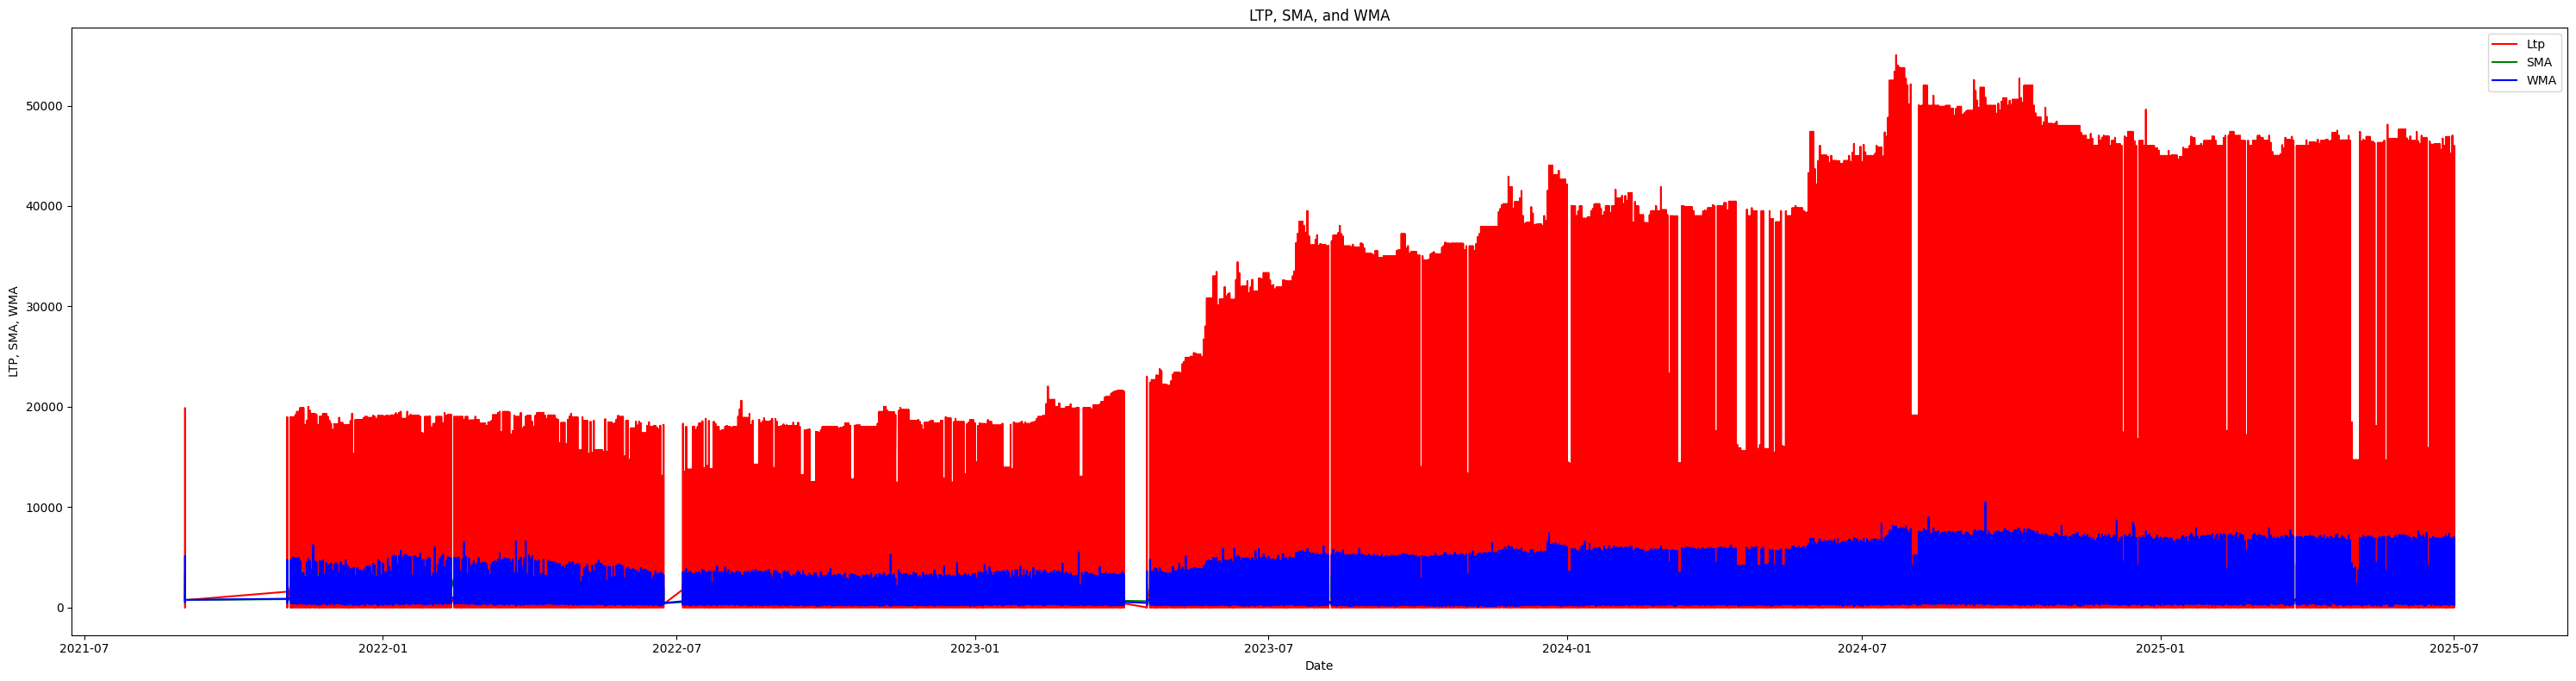

In [23]:
plt.figure(figsize=(30, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.plot(new_data['Date'], new_data['Close'], label='Ltp', color='red')  # Replace 'Adj Close' with 'Ltp'
plt.plot(new_data['Date'], new_data['SMA'], label='SMA', color='green')  # Replace 'Adj Close' with 'Ltp'
plt.plot(new_data['Date'], new_data['WMA'], label='WMA', color='blue')  # Replace 'Adj Close' with 'Ltp'

plt.xlabel('Date')
plt.ylabel('LTP, SMA, WMA')
plt.title("LTP, SMA, and WMA")
plt.legend()
plt.tight_layout()
# # Save the figure to a file
# plt.savefig("output_plot.png")
#Display the figure
plt.show()

In [24]:
# drop the Date column from the new_data DataFrame
feature_data = new_data.drop('Date', axis=1)
# Remove commas from numeric columns and convert to float
feature_data = feature_data.replace(',', '', regex=True).astype(float)
# print the resulting DataFrame
feature_data,feature_data.shape

(          Close    Open    High     Low          SMA          WMA  Momentum  \
 246656  2125.00  2113.0  2154.9  2085.6  1128.765000  1117.121333   1112.50   
 246655   636.00   633.1   683.0   603.0  1136.479286  1051.419333    108.00   
 246654   740.20   755.0   770.0   740.0  1148.422143   998.582095    167.20   
 246653  1795.00  1780.0  1899.0  1768.0  1246.336429  1084.792476   1370.80   
 246652  4650.00  4804.0  4804.0  4650.0  1523.122143  1538.614286   3875.00   
 ...         ...     ...     ...     ...          ...          ...       ...   
 197433   209.88   209.0   211.0   206.0   565.453571   582.960856   -250.00   
 197432  1332.30  1270.0  1345.0  1270.0   582.820714   685.207047    243.14   
 197431   342.00   332.0   348.0   322.1   544.528571   653.097618   -536.09   
 197438   393.40   382.7   399.6   382.7   557.290714   632.947142    178.67   
 197333   293.70   281.6   296.0   281.6   547.130000   597.801714   -142.25   
 
         Stochastic_%K  Stochastic_%D 

In [26]:
# Run only to save the summary data to the location
technical_indicator = feature_data[['SMA', 'WMA', 'Momentum',
       'Stochastic_%K', 'Stochastic_%D', 'RSI', 'MACD', 'MACD_Signal',
       'Larry_Williams_R%', 'CCI']]

# Compute summary statistics
summary_stats = technical_indicator.describe()

# Transpose the summary statistics
summary_stats_transposed = summary_stats.transpose()

# Save the transposed summary statistics to the given location
output_file = r'C:\Users\amitk\Desktop\nepal_stock/data_summary.csv'
summary_stats_transposed.to_csv(output_file)

In [27]:
# convert dataframe to array
dataset = feature_data.values
dataset,dataset.shape

(array([[2125.        , 2113.        , 2154.9       , ...,  152.59940409,
          -69.42023976,   65.99324882],
        [ 636.        ,  633.1       ,  683.        , ...,  136.41680052,
          -90.95497664,  -33.5414835 ],
        [ 740.2       ,  755.        ,  770.        , ...,  116.94655464,
          -89.44797893,  -27.25191202],
        ...,
        [ 342.        ,  332.        ,  348.        , ...,   13.25510024,
          -82.46445498,  -29.95398156],
        [ 393.4       ,  382.7       ,  399.6       , ...,   15.01884266,
          -79.75776725,  -24.24854442],
        [ 293.7       ,  281.6       ,  296.        , ...,   10.95890453,
          -85.00789889,  -37.32364659]], shape=(361684, 14)),
 (361684, 14))

Preprocessing

In [28]:
from sklearn.preprocessing import MinMaxScaler

#create minMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#Reshape the array to have four feature
dataset_reshaped = dataset.reshape(-1,14)

#scale the date
scaled_data = scaler.fit_transform(dataset_reshaped)
scaled_data,scaled_data.shape

(array([[0.03863636, 0.03836238, 0.03793451, ..., 0.28969242, 0.29492492,
         0.4491785 ],
        [0.01156364, 0.01149419, 0.01202342, ..., 0.2844324 , 0.08723426,
         0.31234419],
        [0.01345818, 0.01370733, 0.01355495, ..., 0.27810376, 0.10176842,
         0.32099071],
        ...,
        [0.00621818, 0.0060276 , 0.00612614, ..., 0.24439971, 0.16912066,
         0.31727607],
        [0.00715273, 0.00694808, 0.00703449, ..., 0.244973  , 0.19522517,
         0.32511956],
        [0.00534   , 0.00511256, 0.00521074, ..., 0.24365335, 0.14459055,
         0.3071447 ]], shape=(361684, 14)),
 (361684, 14))

In [29]:
#checking to reverse to orignal data
original_data = scaler.inverse_transform(scaled_data)
print("Original Data Shape:",original_data.shape)
print(original_data)

Original Data Shape: (361684, 14)
[[2125.         2113.         2154.9        ...  152.59940409
   -69.42023976   65.99324882]
 [ 636.          633.1         683.         ...  136.41680052
   -90.95497664  -33.5414835 ]
 [ 740.2         755.          770.         ...  116.94655464
   -89.44797893  -27.25191202]
 ...
 [ 342.          332.          348.         ...   13.25510024
   -82.46445498  -29.95398156]
 [ 393.4         382.7         399.6        ...   15.01884266
   -79.75776725  -24.24854442]
 [ 293.7         281.6         296.         ...   10.95890453
   -85.00789889  -37.32364659]]


Train test Split

In [30]:
# 80/20 train/test split
import numpy as np
training_data_len = int(np.ceil(len(scaled_data)*0.8))
train_data = scaled_data[0:int(training_data_len), :]
x_train, y_train = [], []

In [31]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, :])
     # Assuming you want to predict the 'Ltp' feature
    y_train.append(train_data[i, 0]) 

In [32]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train.shape,y_train.shape

((289288, 60, 14), (289288,))

In [34]:
# x_train,y_train = np.array(x_train),np.array(y_train)
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape,y_train.shape

((289288, 60, 14), (289288,))

In [35]:
# Check if x_train is not empty before reshaping
if x_train.shape[0] > 0:
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 14))
    print("Reshape successful!")
else:
    print("x_train is empty. Check the loop for appending values.")

Reshape successful!


LSTM

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 14)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\amitk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
# Train the model
lstm_model_nica_10 = model.fit(x_train, y_train, batch_size=10, epochs=2)

Epoch 1/2
28929/28929 ━━━━━━━━━━━━━━━━━━━━ 2120s 73ms/step - loss: 0.0021
Epoch 2/2
28929/28929 ━━━━━━━━━━━━━━━━━━━━ 2103s 73ms/step - loss: 0.0019


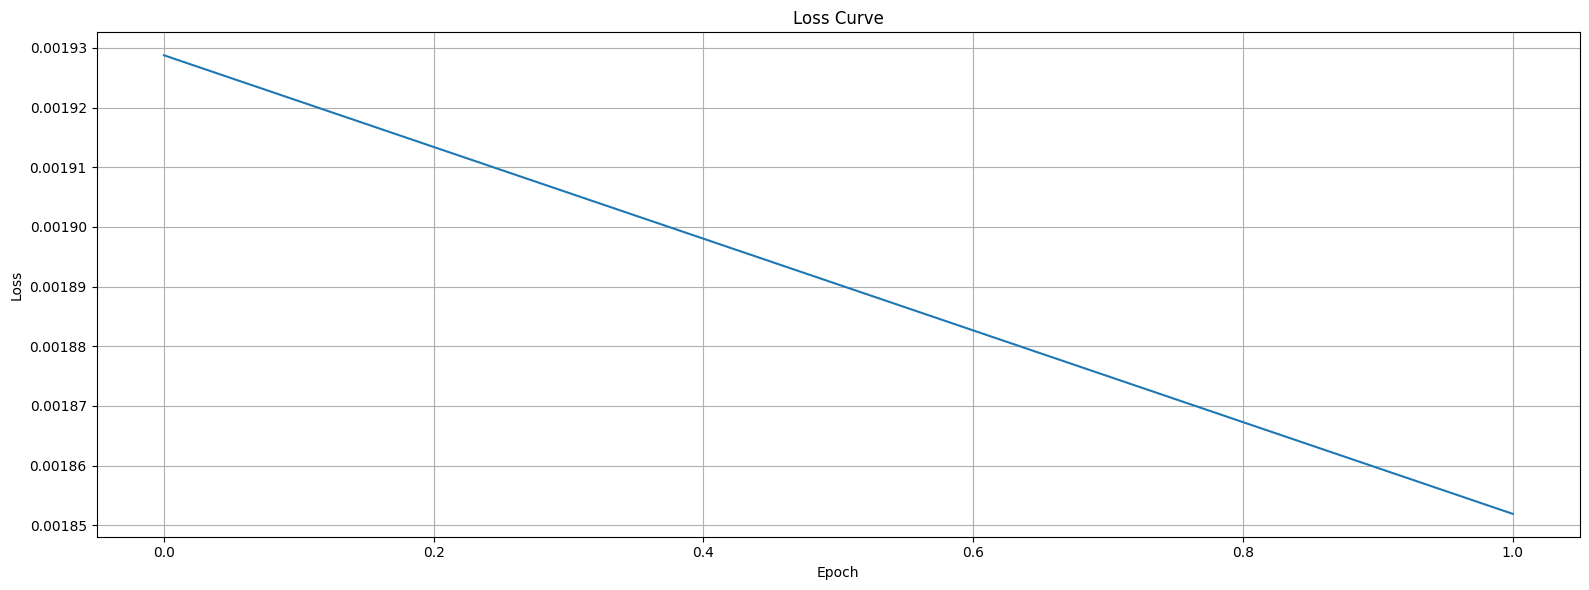

In [40]:
import os
import matplotlib.pyplot as plt


# Plot the loss curve
plt.figure(figsize=(16,6))
plt.plot(lstm_model_nica_10.history['loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
import pickle
import os

# Define the folder and model name
# Using forward slashes
model_name = 'lstm_model_nica_10.pkl'

# Define the full file path where you want to save the model using f-string
file_path = f'C:\\Users\\amitk\\Desktop\\nepal_stock\\{model_name}'

# Ensure the directory exists, create if it doesn't
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the trained model to disk
with open(file_path, 'wb') as f:
    pickle.dump('lstm_model_nica_10.pkl', f)

In [43]:
# Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, 0]  # Assuming you want to predict the 'Ltp' feature

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, :])

In [44]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [45]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 14))

In [46]:
# Assuming the model has been trained and you have the x_test data
# Generate predictions on the test data
predictions = model.predict(x_test)

# predictions = scaler.inverse_transform(predictions)  # Inverse transform to get original scale

# # Reshape predictions to match the original data shape
predictions = predictions.reshape(-1, 1)

# # Repeat the column to match the original data shape
predictions = np.repeat(predictions, 14, axis=1)

# # Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

2261/2261 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step


In [47]:
predictions

array([[ 901.73846 ,  903.0501  ,  931.345   , ..., -688.20715 ,
         -98.30003 , -248.81789 ],
       [ 993.27637 ,  994.7211  , 1025.8883  , ..., -683.08685 ,
         -98.127464, -247.60725 ],
       [1042.076   , 1043.5918  , 1076.2903  , ..., -680.3571  ,
         -98.03546 , -246.96184 ],
       ...,
       [ 752.3655  ,  753.45984 ,  777.0677  , ..., -696.5626  ,
         -98.581635, -250.79346 ],
       [ 842.23804 ,  843.4631  ,  869.891   , ..., -691.53546 ,
         -98.4122  , -249.60481 ],
       [ 836.33246 ,  837.54895 ,  863.7915  , ..., -691.8658  ,
         -98.42333 , -249.68292 ]], shape=(72336, 14), dtype=float32)

In [48]:
#Ltp prdictions
predicted_ltp_values = predictions[:, 0]
predicted_ltp_values

array([ 901.73846,  993.27637, 1042.076  , ...,  752.3655 ,  842.23804,
        836.33246], shape=(72336,), dtype=float32)

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\1390068124.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predicted_ltp_values


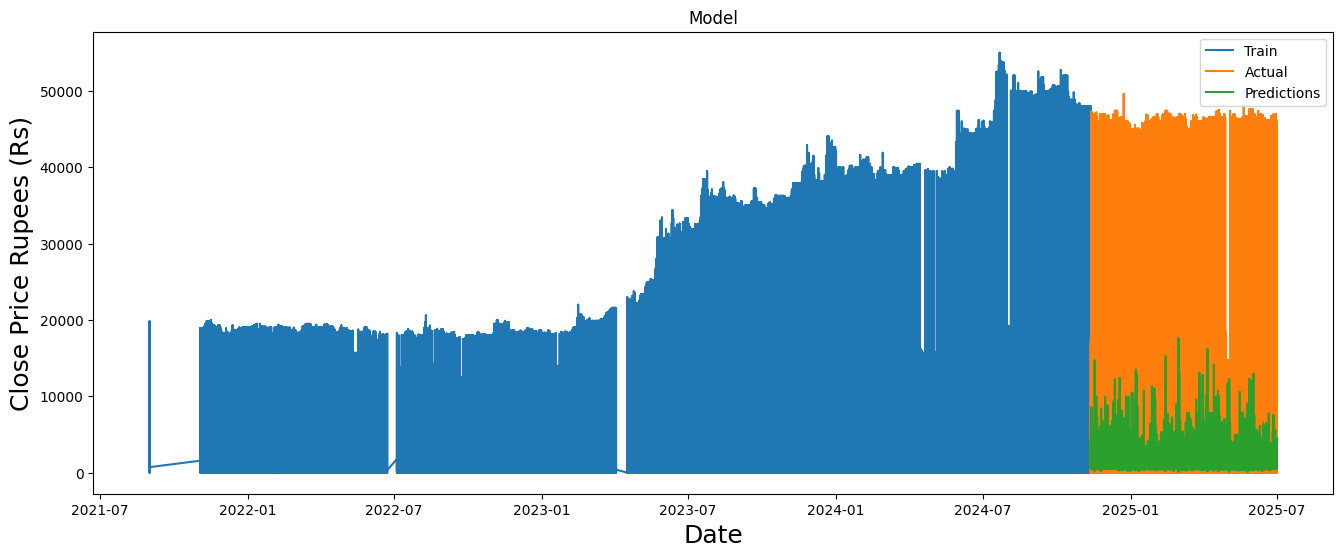

In [49]:
import matplotlib.pyplot as plt

# Plotting
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid.loc[:, 'Predictions'] = predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Close'])  
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
        # save the plot
        # Save the plot to the specified folder
# plot_no = 1
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()
       
# # Create the directory if it doesn't exist
# os.makedirs(save_folder, exist_ok=True)

In [50]:
# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\1726138887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


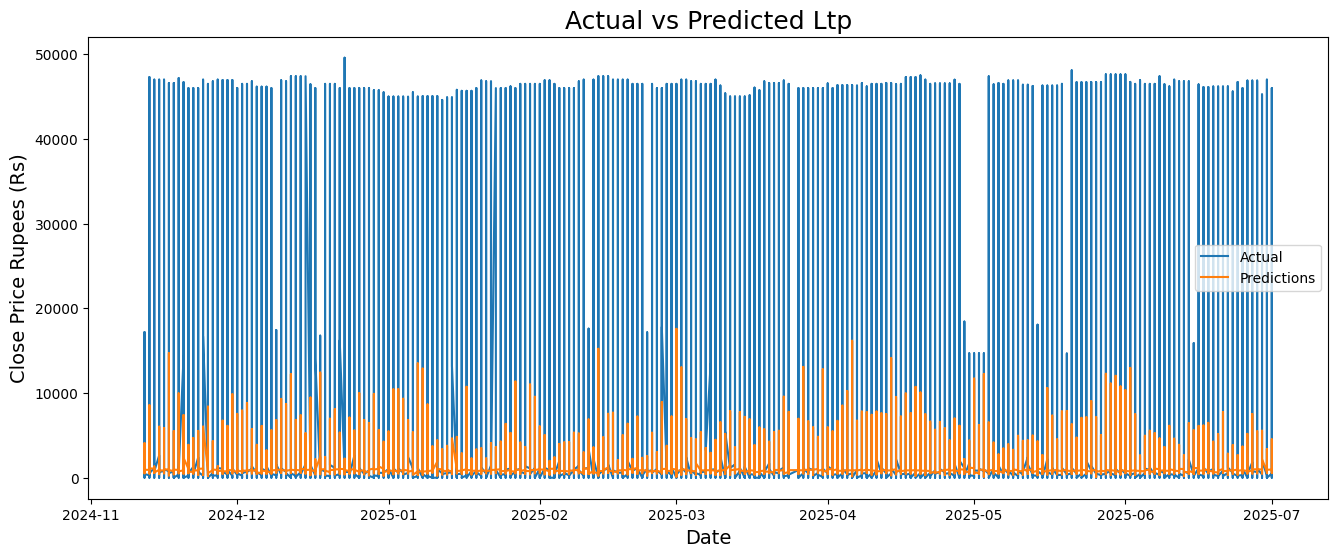

In [52]:
# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Close'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')
# plot_no = 2
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))

plt.legend()
plt.show()

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\1784425886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']


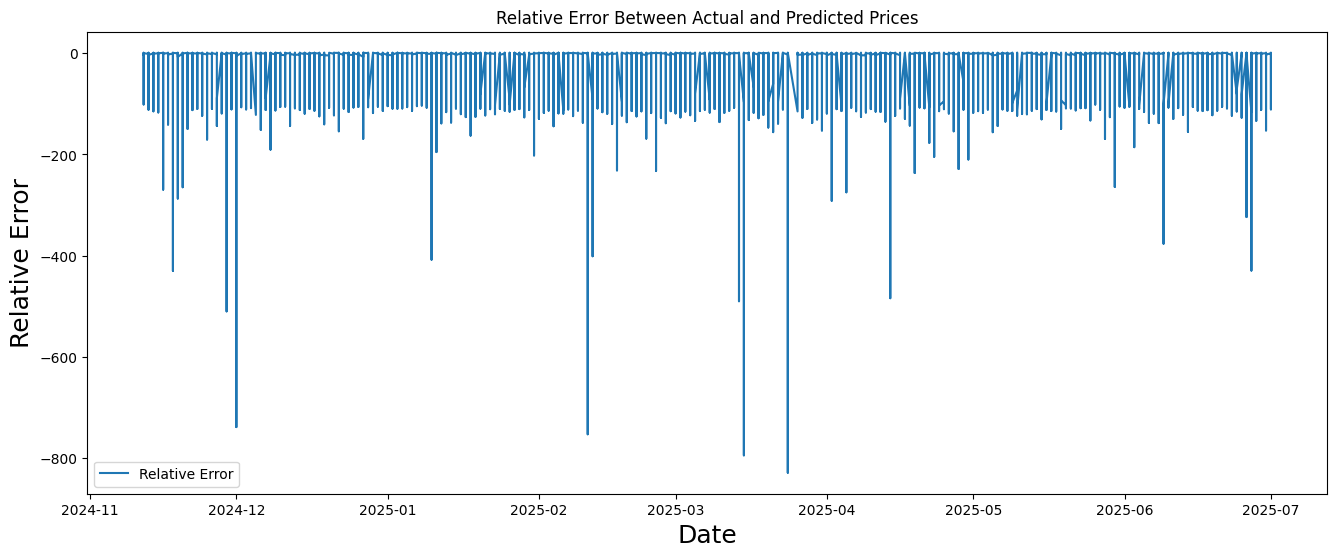

In [53]:
# Calculate relative error
valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()
plot_no = 3
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 2827.1091861154905
Mean Absolute Error (MAE): 783.2581469757278
Mean Absolute Percentage Error (MAPE): 1095.8796467952664%


BPNN

In [55]:
from sklearn.neural_network import MLPRegressor

In [56]:
x_train

array([[[3.86363636e-02, 3.83623820e-02, 3.79345067e-02, ...,
         2.89692417e-01, 2.94924921e-01, 4.49178497e-01],
        [1.15636364e-02, 1.14941903e-02, 1.20234201e-02, ...,
         2.84432397e-01, 8.72342615e-02, 3.12344187e-01],
        [1.34581818e-02, 1.37073348e-02, 1.35549539e-02, ...,
         2.78103755e-01, 1.01768423e-01, 3.20990708e-01],
        ...,
        [4.09272727e-04, 4.16666667e-04, 4.04712195e-04, ...,
         2.15897967e-01, 1.11766145e-03, 2.42638297e-01],
        [4.42363636e-02, 4.39360930e-02, 4.33934563e-02, ...,
         2.17535794e-01, 3.72207434e-01, 4.57967638e-01],
        [1.30181818e-02, 1.30174292e-02, 1.29388196e-02, ...,
         2.16412791e-01, 1.07878962e-01, 3.06071547e-01]],

       [[1.15636364e-02, 1.14941903e-02, 1.20234201e-02, ...,
         2.84432397e-01, 8.72342615e-02, 3.12344187e-01],
        [1.34581818e-02, 1.37073348e-02, 1.35549539e-02, ...,
         2.78103755e-01, 1.01768423e-01, 3.20990708e-01],
        [3.26363636e-02, 

In [57]:
x_train.shape, y_train.shape

((289288, 60, 14), (289288,))

In [58]:
#  Flatten x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_train.shape

(289288, 840)

(x_train.shape[0], x_train.shape[1]*x_train.shape[2]): This tuple specifies the desired shape of the flattened array.
x_train.shape[0] represents the number of samples in the dataset.
x_train.shape[1]*x_train.shape[2] calculates the total number of elements in each sample after flattening, which is achieved by multiplying the width and height dimensions of each image.

In [59]:
# Define the BPNN model
bpnn_model_nica_10 = MLPRegressor(hidden_layer_sizes=(128, 64), 
                           activation='relu', 
                           solver='adam', 
                           alpha=0.001, 
                           batch_size=10, 
                           max_iter=10, 
                           random_state=42)

In [60]:
# Train the BPNN model

bpnn_model_nica_10.fit(x_train, y_train)

c:\Users\amitk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, batch_size=10, hidden_layer_sizes=(128, 64),
             max_iter=10, random_state=42)

In [61]:
# Define the folder and model name
# Using forward slashes

    
switch_folder = 'nica/bpnn/10'
model_name = 'bpnn_model_nica_10.pkl'

# Define the full file path where you want to save the model using f-string
file_path = f'C:\\Users\\amitk\\Desktop\\nepal_stock\\{model_name}'

# Ensure the directory exists, create if it doesn't
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the trained model to disk
with open(file_path, 'wb') as f:
    pickle.dump('bpnn_model_nica_10.pkl', f)

In [62]:
# Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, 0]  # Assuming you want to predict the 'Ltp' feature

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, :])

In [63]:
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test.shape

(72336, 60, 14)

In [64]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
x_test.shape

(72336, 840)

In [65]:
# Generate predictions on the test data
predictions = bpnn_model_nica_10.predict(x_test)


# Reshape predictions to match the original data shape
predictions = predictions.reshape(-1, 1)

# Repeat the column to match the original data shape
predictions = np.repeat(predictions, 14, axis=1)

# # Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

In [66]:
predictions,predictions.shape

(array([[ 941.43160961,  942.80096468,  972.3413769 , ..., -685.98687016,
          -98.22520298, -248.29292306],
        [ 941.43160961,  942.80096468,  972.3413769 , ..., -685.98687016,
          -98.22520298, -248.29292306],
        [ 941.43160961,  942.80096468,  972.3413769 , ..., -685.98687016,
          -98.22520298, -248.29292306],
        ...,
        [ 941.43160961,  942.80096468,  972.3413769 , ..., -685.98687016,
          -98.22520298, -248.29292306],
        [ 941.43160961,  942.80096468,  972.3413769 , ..., -685.98687016,
          -98.22520298, -248.29292306],
        [ 941.43160961,  942.80096468,  972.3413769 , ..., -685.98687016,
          -98.22520298, -248.29292306]], shape=(72336, 14)),
 (72336, 14))

In [67]:
predicted_ltp_values = predictions[:, 0]
predicted_ltp_values.shape, predicted_ltp_values

((72336,),
 array([941.43160961, 941.43160961, 941.43160961, ..., 941.43160961,
        941.43160961, 941.43160961], shape=(72336,)))

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\545859497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predicted_ltp_values


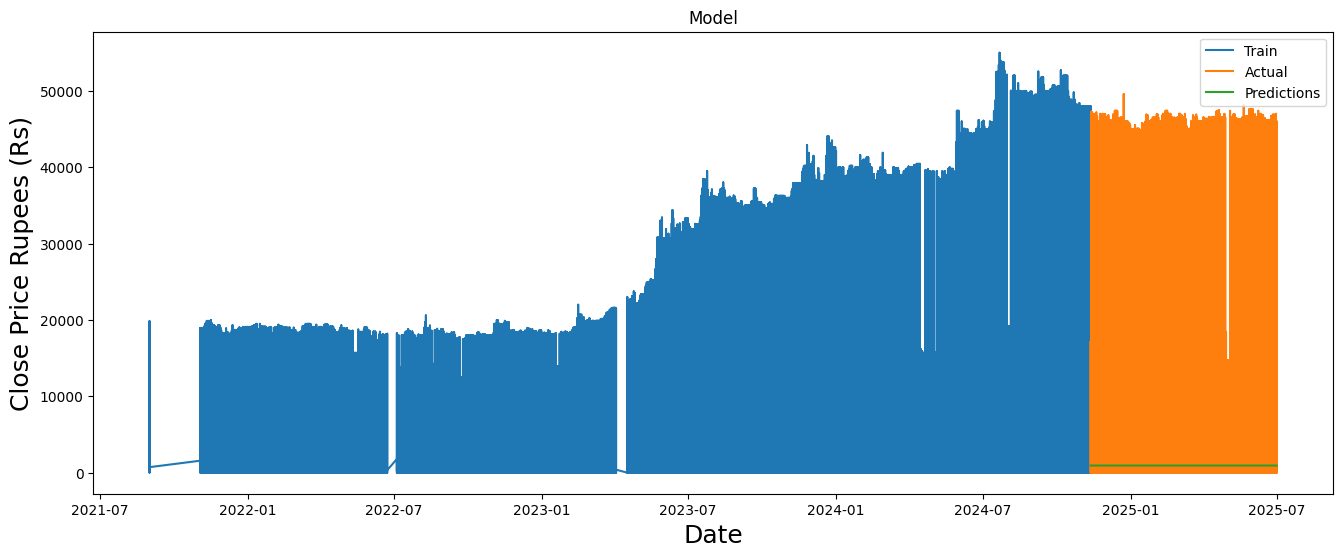

In [68]:
import matplotlib.pyplot as plt

train = new_data[:training_data_len]
valid = new_data[training_data_len:]
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid.loc[:, 'Predictions'] = predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Close'])  # Used 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
plt.show()

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\2221632872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


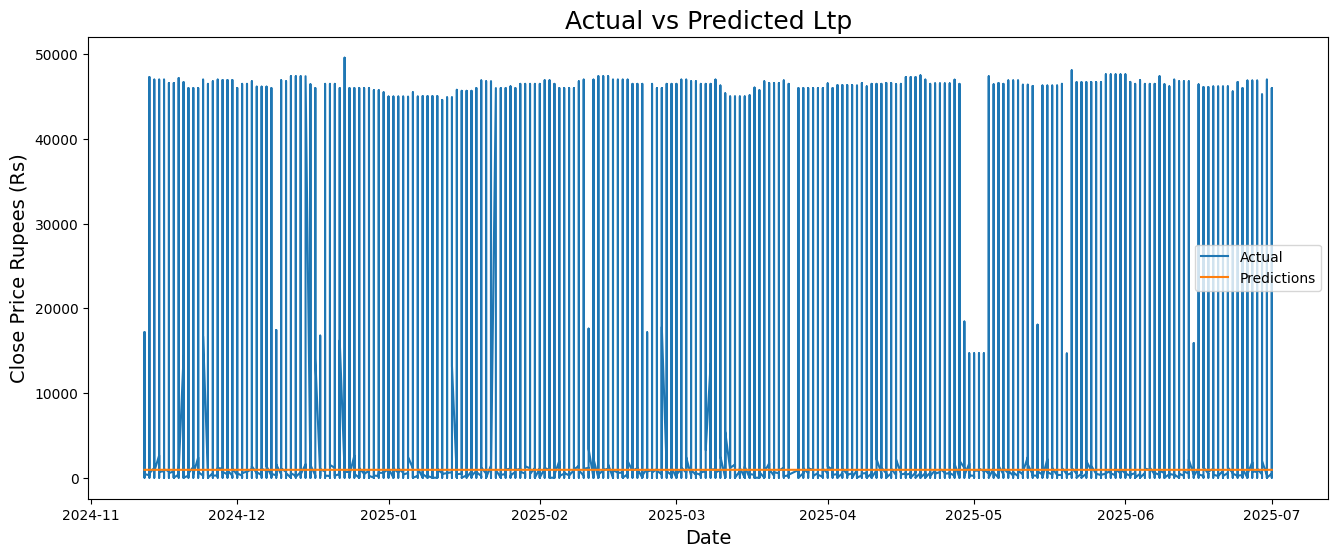

In [69]:
# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Close'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plt.legend()


# plot_no = 2
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()

C:\Users\amitk\AppData\Local\Temp\ipykernel_13028\3473490317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']


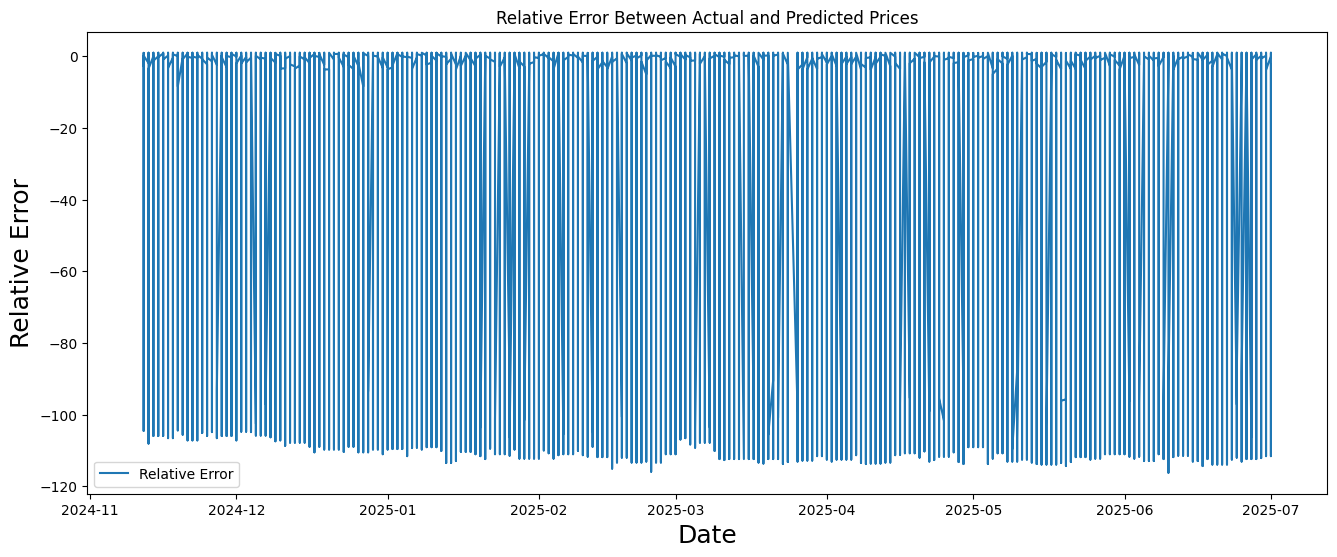

In [70]:
# Calculate relative error
valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()

# plot_no = 3
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 2978.194585836593
Mean Absolute Error (MAE): 807.1737716633032
Mean Absolute Percentage Error (MAPE): 1187.2621397402656%


In [73]:
# Save the output to a file
file_path = os.path.join('evaluation_results.txt')
with open(file_path, 'w') as f:
    f.write(f'Root Mean Squared Error (RMSE): {rmse}\n')
    f.write(f'Mean Absolute Error (MAE): {mae}\n')
    f.write(f'Mean Absolute Percentage Error (MAPE): {mape}%\n')

GRU

In [74]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
gru_model.add(GRU(units=64))
gru_model.add(Dense(1))

c:\Users\amitk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
gru_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = gru_model.fit(x_train, y_train, epochs=2, batch_size=10, verbose=2)


# Plot the loss graph
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.show()
plt.show()

Epoch 1/2


In [ ]:
import pickle
import os

# Define the folder and model name
  # Using forward slashes

model_name = 'gru_model.pkl'

# Define the full file path where you want to save the model using f-string
file_path = f'C:\\Users\\amitk\\Desktop\\nepal_stock\\{model_name}'

# Ensure the directory exists, create if it doesn't
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the trained model to disk
with open(file_path, 'wb') as f:
    pickle.dump('gru_model.pkl', f)

In [ ]:
# Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, 0]  # Assuming you want to predict the 'Ltp' feature

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, :])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 4))

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [ ]:
# Generate predictions on the test data
predictions = gru_model.predict(x_test)


# Reshape predictions to match the original data shape
predictions = predictions.reshape(-1, 1)

# Repeat the column to match the original data shape
predictions = np.repeat(predictions, 14, axis=1) ### Edited here

In [ ]:
# # Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions

In [ ]:
#Extract the Ltp predictions result from ['ltp', 'high', 'low', 'open'] 
predicted_ltp_values = predictions[:, 0]
predicted_ltp_values

In [ ]:
import matplotlib.pyplot as plt

# Assuming train and valid DataFrames are defined earlier

# # Get the dates for the train and validation data
# train_dates = train.index  # Assuming 'Date' is in the index
# valid_dates = valid.index  # Assuming 'Date' is in the index

# Plotting
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid.loc[:, 'Predictions'] = predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Close'])  # Used 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
# locFolder = 'hydro/bpnn/250'
# plot_no = 1
# plt.savefig(f'D:/Financial_analysis/01_stock_results/{locFolder}/plot{plot_no}.png')
# plt.savefig('D:/Financial_analysis/01_stock_results/NMB/bpnn/250/plot01.png')
plt.show()

In [ ]:
# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Close'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plt.legend()
# # locFolder = 'NMB/bpnn/10'
# plot_no = 2
# plt.savefig(f'D:/Financial_analysis/01_stock_results/{locFolder}/plot{plot_no}.png')
plt.show()

In [ ]:
# Calculate relative error
valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()
# plot_no = 3
# plt.savefig(f'D:/Financial_analysis/01_stock_results/{locFolder}/plot{plot_no}.png')
# plt.savefig('D:/Financial_analysis/01_stock_results/NICA/bpnn/10/plot03.png')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
# Save the output to a file
file_path = os.path.join('evaluation_results.txt')
with open(file_path, 'w') as f:
    f.write(f'Root Mean Squared Error (RMSE): {rmse}\n')
    f.write(f'Mean Absolute Error (MAE): {mae}\n')
    f.write(f'Mean Absolute Percentage Error (MAPE): {mape}%\n')